In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models,optimizers,regularizers

In [3]:
model = models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [4]:
train_data_gen = ImageDataGenerator(rescale=1./255,rotation_range=40,
                                    width_shift_range=0.2,
                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                  horizontal_flip=True)

In [5]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
# Todas las imagenes serán reescaladas a 150 x 150
# class_mode='binary' -> Porque estamos trabajando con clasificación binaria
train_generator = train_data_gen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/train',
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

validation_generator = test_data_gen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/validation',
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
checkpoint = ModelCheckpoint('cat_dog_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True)

In [8]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [9]:
hist = model.fit(train_generator,steps_per_epoch=2000//32,epochs=100,
                validation_data=validation_generator,
                validation_steps=1000//32,
                callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.6983 - accuracy: 0.5218
Epoch 1: val_accuracy improved from -inf to 0.58569, saving model to cat_dog_model.hdf5
62/62 [==============================] - 41s 504ms/step - loss: 0.6983 - accuracy: 0.5218 - val_loss: 0.6795 - val_accuracy: 0.5857
Epoch 2/100


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.5655
Epoch 2: val_accuracy improved from 0.58569 to 0.59879, saving model to cat_dog_model.hdf5
62/62 [==============================] - 15s 245ms/step - loss: 0.6801 - accuracy: 0.5655 - val_loss: 0.6502 - val_accuracy: 0.5988
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6458 - accuracy: 0.6220
Epoch 3: val_accuracy improved from 0.59879 to 0.68548, saving model to cat_dog_model.hdf5
62/62 [==============================] - 15s 242ms/step - loss: 0.6458 - accuracy: 0.6220 - val_loss: 0.5890 - val_accuracy: 0.6855
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.6474
Epoch 4: val_accuracy did not improve from 0.68548
62/62 [==============================] - 15s 248ms/step - loss: 0.6281 - accuracy: 0.6474 - val_loss: 0.6328 - val_accuracy: 0.6119
Epoch 5/100
62/62 [==============================] - ETA: 0s - loss: 0.6216 - accuracy: 0.6468
Epo

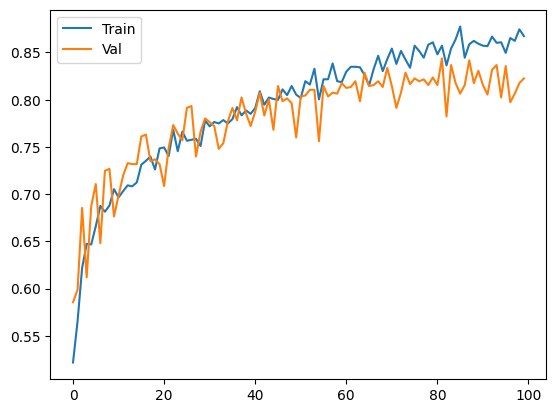

In [10]:
plt.plot(hist.history['accuracy'],label="Train")
plt.plot(hist.history['val_accuracy'],label="Val")
plt.legend()
plt.show()

In [11]:
test_generator = test_data_gen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/test',
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
model2 = model
model2.load_weights('/kaggle/working/cat_dog_model.hdf5')
model2.evaluate(test_generator)

32/32 [==============================] - 8s 260ms/step - loss: 0.4534 - accuracy: 0.8100


[0.45336034893989563, 0.8100000023841858]